# 1 :- Classification

In [43]:
# We are importing the libraries: numpy (scientific computing) and matplotlib (plotting)

import numpy as np
import matplotlib.pyplot as plt

In [44]:
# it makes random number predictable
np.random.seed(0)   # For reproducibility

# Index for dogs

In [45]:
# Dogs: higher ear flappiness index, higher, lower,whisker length
dogs_whisker_length = np.random.normal(loc=5, scale=1,size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)
 
# From between the x-axis the there is median and mode the data is sample from x-axis. 
# In the range of 4 to 5

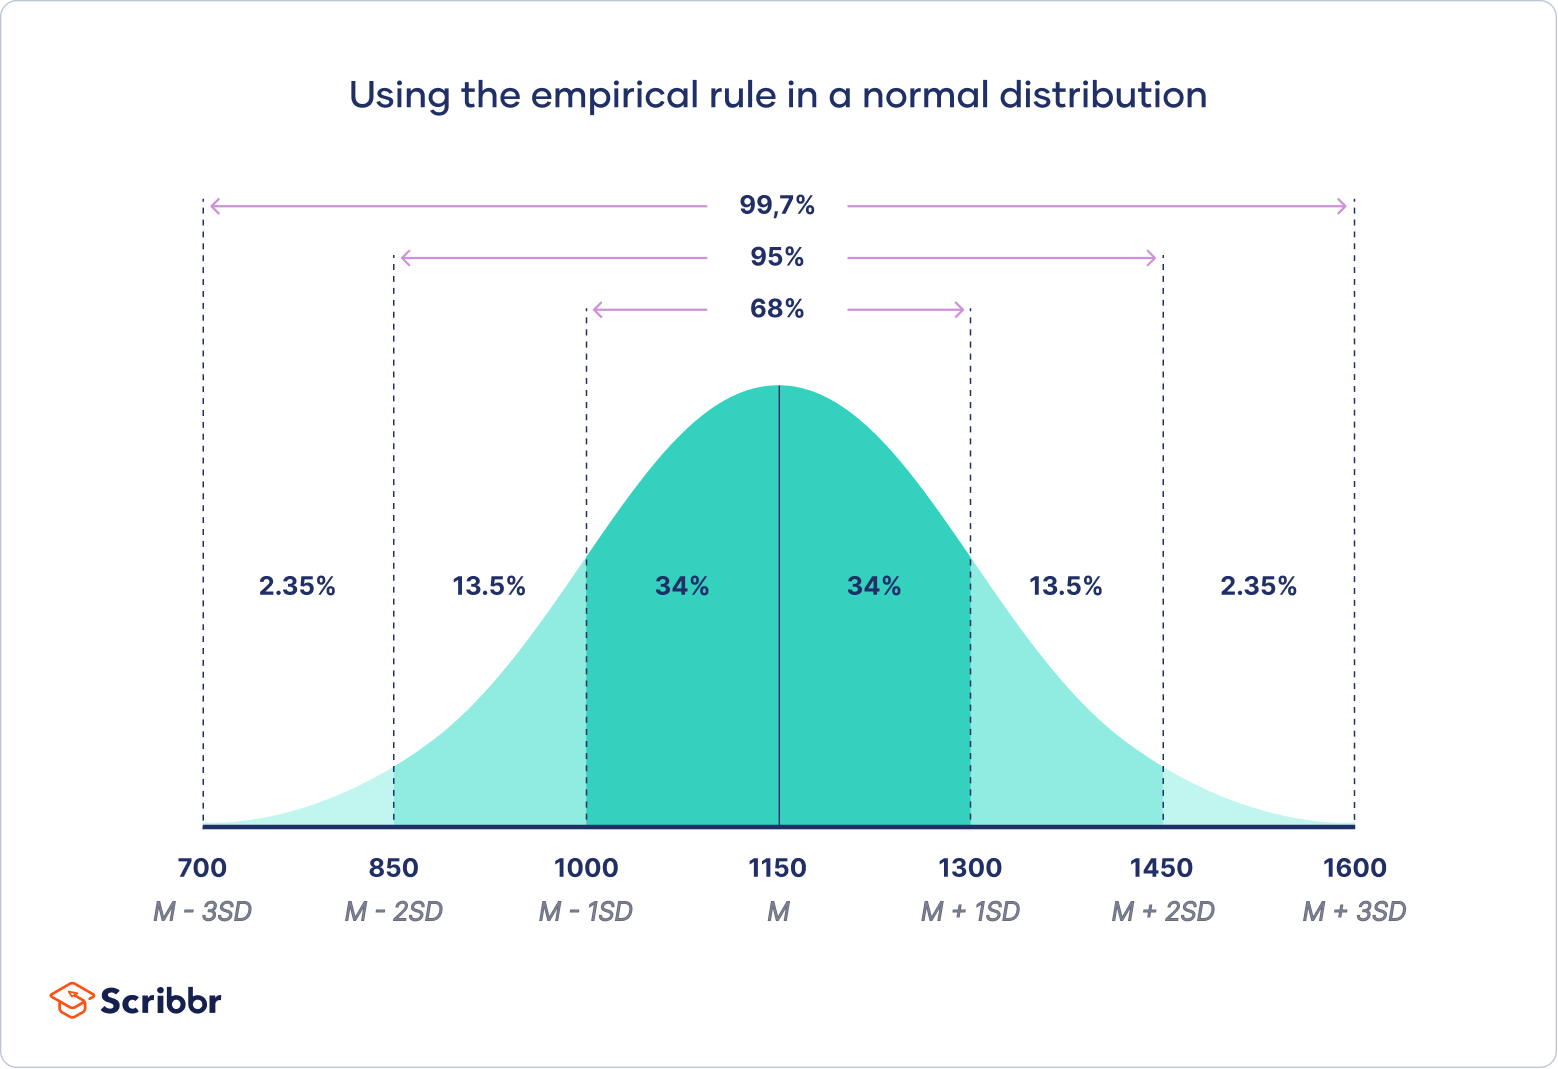

In [46]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [47]:
dogs_ear_flappiness_index

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

# Index for cats

In [48]:
# Cats: lower ear flappiness index, higher whisker length

cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

# Plotting

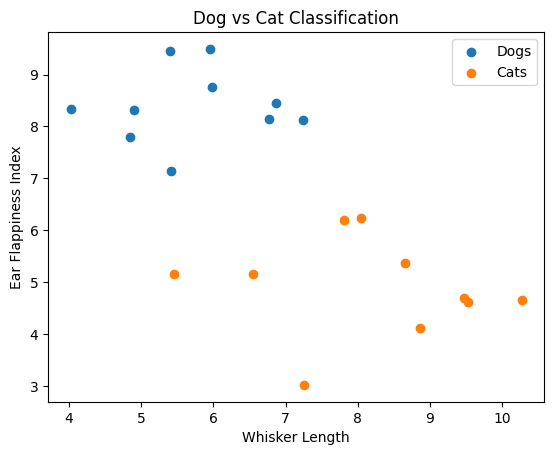

In [49]:
# plot the data points

plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.title("Dog vs Cat Classification")
plt.legend()
plt.show()

# Implementing Random linear classifier

In [50]:
# Implementing random linear classifier algorithm
def random_linear_classifier(data_dogs, data_cats,k,d):
    # d is the number of features
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        # Randomly select k data points
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0 

    return best_theta, best_theta0

In [51]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1

    return error

In [52]:
# Prepare data for algorithm
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T

In [53]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [54]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

# Run the algorithm

In [55]:
# Run random linear classifier algorithm
k = 200   # Number of iterations
d = 2     # number of features
best_theta, best_theta0 = random_linear_classifier(dogs_data, cats_data, k,d)

In [56]:
# here the output will be theta 1 and theta 2
best_theta

array([-1.07075262,  1.05445173])

In [57]:
best_theta0 

-0.40317694697317963

# Plotting the middle line (hypothesis)

In [58]:
# Plot the decision boundry
x_vals = np.linspace(2,10,100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0 / best_theta[1])

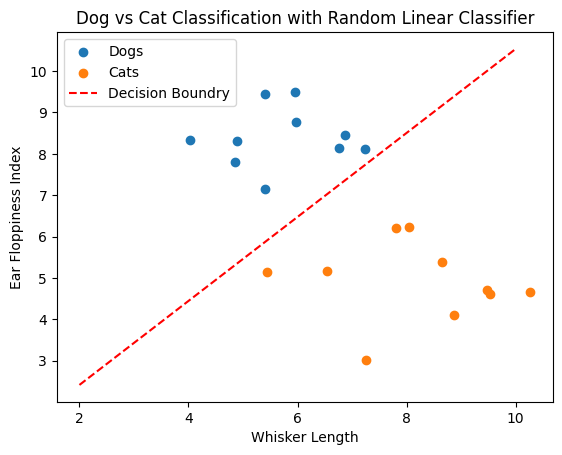

In [59]:
# Which things to plot
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats') 

# plot the decision boundry
plt.plot(x_vals, y_vals, color='red', linestyle='--',label='Decision Boundry')

# x-axis label
plt.xlabel('Whisker Length')

# y-axis label
plt.ylabel('Ear Floppiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.show()